In [9]:
# Used libraries 
import pandas as pd
import os
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import spacy
import re
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



In [10]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
def read_data():
    df_artists = pd.read_csv('data/spotify_artists.csv', sep=',') 
    df_tracks = pd.read_csv('data/spotify_tracks.csv', sep=',')   
    return df_artists, df_tracks 
     
df_artists, df_tracks = read_data()

In [12]:
pd.set_option('display.max_columns', None)
df_artists.head(5)  

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [13]:
#check in df_artists if we have duplicates via id
df_artists[df_artists.duplicated(['id'])]

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type


In [14]:
#check if there are missing genres
df_artists['genres'].value_counts()

#remove the rows with missing genres
df_artists = df_artists[df_artists['genres'] != '[]']
df_artists.head(5)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
2,2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist
9,9,25,992,['classic finnish pop'],5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist


In [15]:
#convert the string to list
import ast
df_artists['genres'] = df_artists['genres'].apply(ast.literal_eval)
df_artists.head(5)    

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"[sertanejo, sertanejo pop, sertanejo tradicion...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
2,2,26,1596,[danish pop rock],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,[uk alternative pop],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,[french baroque],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist
9,9,25,992,[classic finnish pop],5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist


### Preprocessing | Text standardization or normalization

In [16]:
#put everything in lower case
df_artists['genres'] = df_artists['genres'].apply(lambda x: [genre.strip().lower() for genre in x])

In [17]:
#remove the characters that are not letters (both uppercase and lowercase) or whitespace
df_artists['cleaned_genres'] = df_artists['genres'].apply(lambda x: [re.sub(r'[^a-zA-Z\s]', '', genre) for genre in x])
df_artists.head(5)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type,cleaned_genres
0,0,44,23230,"[sertanejo, sertanejo pop, sertanejo tradicion...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist,"[sertanejo, sertanejo pop, sertanejo tradicion..."
2,2,26,1596,[danish pop rock],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist,[danish pop rock]
3,3,31,149,[uk alternative pop],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist,[uk alternative pop]
4,4,21,11,[french baroque],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist,[french baroque]
9,9,25,992,[classic finnish pop],5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist,[classic finnish pop]


### Stoppwords

In [18]:
# extract all genres from the cleaned_genres column
all_genres = [genre for sublist in df_artists['cleaned_genres'] for genre in sublist]
genres_stopwords = [word for word in all_genres if word.lower() in stop_words]

# count of stopwords in genres data
stopword_counts = Counter(genres_stopwords)
stopword_counts

Counter()

### Tokenization

In [19]:
df_artists['tokenized_genre'] = df_artists['cleaned_genres'].apply(lambda x: [nltk.word_tokenize(genre) for genre in x])
df_artists.head(5)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type,cleaned_genres,tokenized_genre
0,0,44,23230,"[sertanejo, sertanejo pop, sertanejo tradicion...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist,"[sertanejo, sertanejo pop, sertanejo tradicion...","[[sertanejo], [sertanejo, pop], [sertanejo, tr..."
2,2,26,1596,[danish pop rock],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist,[danish pop rock],"[[danish, pop, rock]]"
3,3,31,149,[uk alternative pop],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist,[uk alternative pop],"[[uk, alternative, pop]]"
4,4,21,11,[french baroque],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist,[french baroque],"[[french, baroque]]"
9,9,25,992,[classic finnish pop],5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist,[classic finnish pop],"[[classic, finnish, pop]]"


In [20]:
stemmer = PorterStemmer()
df_artists['stemmed_genres'] = df_artists['cleaned_genres'].apply(
    lambda x: [stemmer.stem(genre) for genre in x]
)

In [21]:
lemmatizer = WordNetLemmatizer()
df_artists['lemmatized_genres'] = df_artists['cleaned_genres'].apply(
    lambda x: [lemmatizer.lemmatize(genre) for genre in x]
)


In [22]:
df_artists['pos_tags_genres'] = df_artists['cleaned_genres'].apply(
    lambda x: [nltk.pos_tag([genre]) for genre in x]
)

In [23]:
#df_artists['cleaned_genres', 'stemmed_genres', 'lemmatized_genres', 'pos_tags_genres'].head()

#show just cleand genres and stemmed genres
df_artists[['cleaned_genres', 'stemmed_genres', 'lemmatized_genres', 'pos_tags_genres']].head()


,cleaned_genres,stemmed_genres,lemmatized_genres,pos_tags_genres
0,"[sertanejo, sertanejo pop, sertanejo tradicion...","[sertanejo, sertanejo pop, sertanejo tradicion...","[sertanejo, sertanejo pop, sertanejo tradicion...","[[(sertanejo, NN)], [(sertanejo pop, NN)], [(s..."
2,[danish pop rock],[danish pop rock],[danish pop rock],"[[(danish pop rock, NN)]]"
3,[uk alternative pop],[uk alternative pop],[uk alternative pop],"[[(uk alternative pop, NN)]]"
4,[french baroque],[french baroqu],[french baroque],"[[(french baroque, NN)]]"
9,[classic finnish pop],[classic finnish pop],[classic finnish pop],"[[(classic finnish pop, NN)]]"


# EDA

In [24]:
# Flatten the list and count occurrences of each genre
all_genres = [genre for sublist in df_artists['cleaned_genres'] for genre in sublist]
unique_genres, genre_counts = np.unique(all_genres, return_counts=True)

# Optionally, create a DataFrame for better visualization
df_genre_counts = pd.DataFrame({
    'genre': unique_genres,
    'count': genre_counts
}).sort_values(by='count', ascending=False)

In [25]:
df_genre_counts

,genre,count
1789,pop,543
613,dance pop,485
1935,rock,431
924,folkpop,402
1800,pop rap,387
...,...,...
2242,thai rock,1
2241,thai pop,1
2240,thai indie,1
2239,thai idol,1


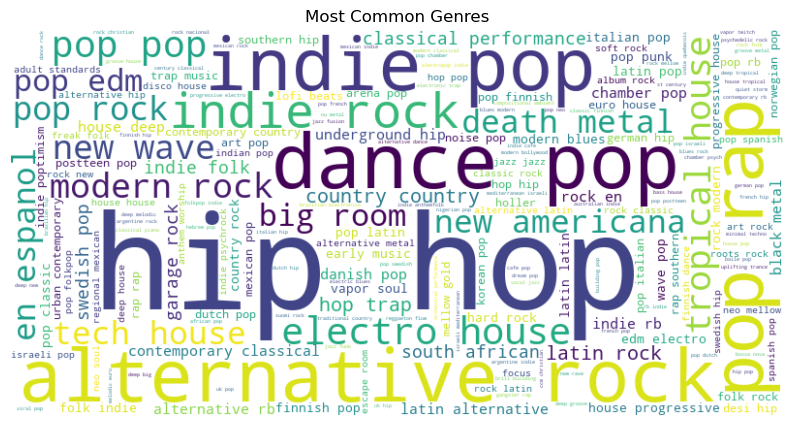

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example for stemmed genres
all_stemmed_genres = " ".join([" ".join(genres) for genres in df_artists['cleaned_genres']])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_stemmed_genres)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Genres')
plt.show()


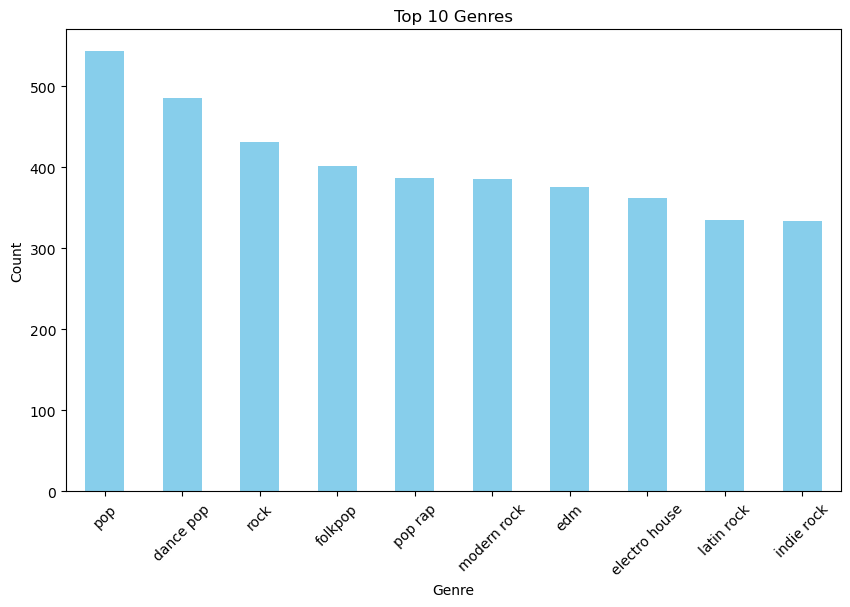

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Count of each unique genre
all_stemmed_genres = " ".join([" ".join(genres) for genres in df_artists['cleaned_genres']])

genre_counts = pd.Series([genre for sublist in df_artists['cleaned_genres'] for genre in sublist]).value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Unique genre count
original_genres_count = len(set([genre for sublist in df_artists['cleaned_genres'] for genre in sublist]))
stemmed_genres_count = len(set([genre for sublist in df_artists['stemmed_genres'] for genre in sublist]))
lemmatized_genres_count = len(set([genre for sublist in df_artists['lemmatized_genres'] for genre in sublist]))

print(f"Original Genres: {original_genres_count}\nStemmed Genres: {stemmed_genres_count}\nLemmatized Genres: {lemmatized_genres_count}")


Original Genres: 2453
Stemmed Genres: 2450
Lemmatized Genres: 2452


In [29]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

all_genres = [genre for sublist in df_artists['cleaned_genres'] for genre in sublist]

# Number of documents
num_documents = len(df_artists)


# Total number of words in the corpus
total_genres = len(all_genres)

# Average document length (in words)
avg_doc_length = total_genres / num_documents

# Minimum and maximum document length (in words)
min_doc_length = min(len(genres) for genres in df_artists['cleaned_genres'])
max_doc_length = max(len(genres) for genres in df_artists['cleaned_genres'])

# Vocabulary size (unique words)
vocabulary_size = len(set(all_genres))

# Most common words and their frequencies
from collections import Counter
word_frequencies = Counter(all_genres)
most_common_words = word_frequencies.most_common(5)

# Print the statistics
print(f"Number of Documents: {num_documents}")
print(f"Average Document Length: {avg_doc_length:.2f} words")
print(f"Minimum Document Length: {min_doc_length} words")
print(f"Maximum Document Length: {max_doc_length} words")
print(f"Vocabulary Size: {vocabulary_size} unique words")
print(f"Most Common Words: {most_common_words}")


Number of Documents: 32589
Average Document Length: 2.68 words
Minimum Document Length: 1 words
Maximum Document Length: 30 words
Vocabulary Size: 2453 unique words
Most Common Words: [('pop', 543), ('dance pop', 485), ('rock', 431), ('folkpop', 402), ('pop rap', 387)]


### Usage of tokenization genre 

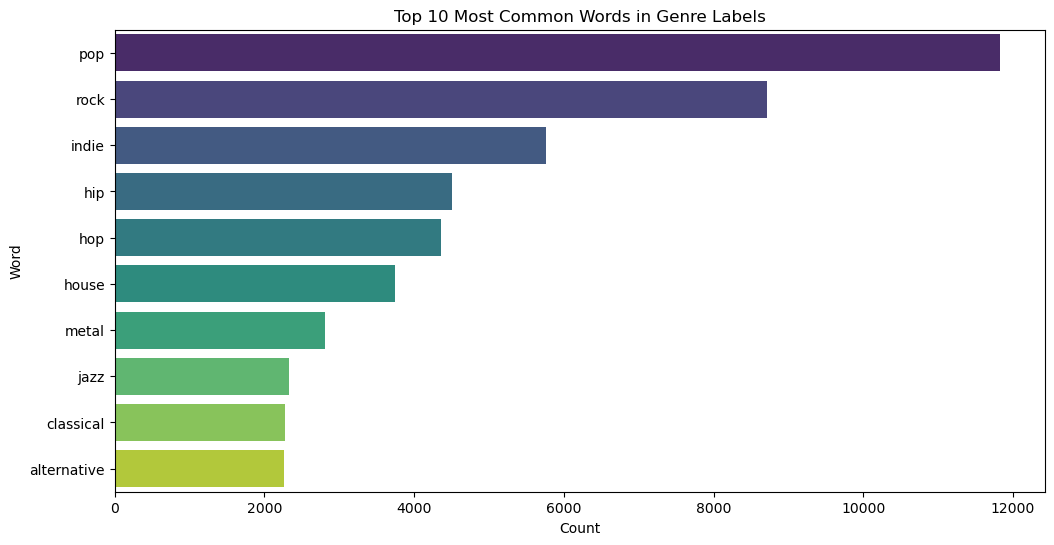

In [30]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have the necessary nltk data
# nltk.download('punkt')

# Example tokenization - this will result in a new column with tokenized genres
df_artists['tokenized_genres'] = df_artists['cleaned_genres'].apply(lambda x: [word_tokenize(genre) for genre in x])

# Flatten the lists to analyze word frequencies
all_genre_words = [word for sublist in df_artists['tokenized_genres'] for subsublist in sublist for word in subsublist]

# Obtain unique words and their counts
unique_words, word_counts = np.unique(all_genre_words, return_counts=True)

# Optionally, create a DataFrame for better visualization
df_word_counts = pd.DataFrame({
    'word': unique_words,
    'count': word_counts
}).sort_values(by='count', ascending=False)

# Visualize the top 10 most common words in genre labels
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=df_word_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Words in Genre Labels')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

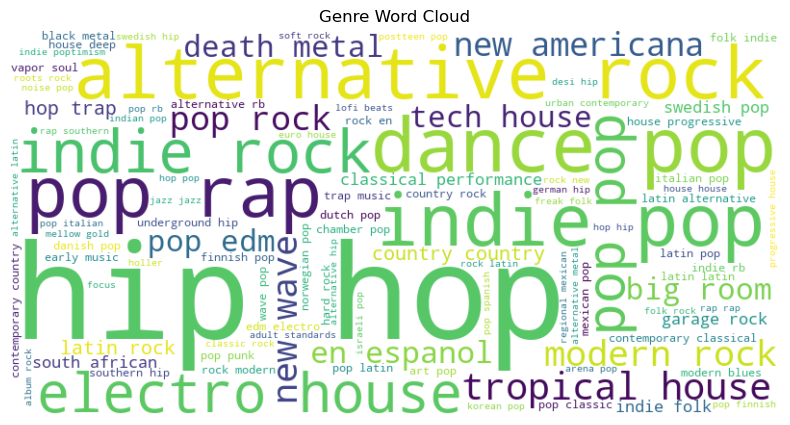

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Flatten the lists to get all words
all_genre_words = [word for sublist in df_artists['tokenized_genres'] for subsublist in sublist for word in subsublist]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(all_genre_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


In [46]:
import textstat

def calculate_readability_metrics(text):
    try:
        ari = textstat.automated_readability_index(text)
        fre = textstat.flesch_reading_ease(text)
        fkgl = textstat.flesch_kincaid_grade(text)
        gfi = textstat.gunning_fog(text)
    except Exception as e:
        print(f"Error: {str(e)} | Text: {text}")
        ari, fre, fkgl, gfi = [None]*4  
    
    return pd.Series((ari, fre, fkgl, gfi))

df_artists['cleaned_genres_str'] = df_artists['cleaned_genres'].astype(str)
df_artists[['ARI', 'FRE', 'FKGL', 'GFI']] = df_artists['cleaned_genres_str'].apply(calculate_readability_metrics)
#df_artists[['ARI', 'FRE', 'FKGL', 'GFI']] = df_artists['cleaned_genres'].apply(calculate_readability_metrics)


In [44]:
df_artists

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type,cleaned_genres,tokenized_genre,stemmed_genres,lemmatized_genres,pos_tags_genres,tokenized_genres,ARI,FRE,FKGL,GFI,cleaned_genres_str
0,0,44,23230,"[sertanejo, sertanejo pop, sertanejo tradicion...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist,"[sertanejo, sertanejo pop, sertanejo tradicion...","[[sertanejo], [sertanejo, pop], [sertanejo, tr...","[sertanejo, sertanejo pop, sertanejo tradicion...","[sertanejo, sertanejo pop, sertanejo tradicion...","[[(sertanejo, NN)], [(sertanejo pop, NN)], [(s...","[[sertanejo], [sertanejo, pop], [sertanejo, tr...",33.2,-28.70,19.0,19.94,"['sertanejo', 'sertanejo pop', 'sertanejo trad..."
2,2,26,1596,[danish pop rock],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist,[danish pop rock],"[[danish, pop, rock]]",[danish pop rock],[danish pop rock],"[[(danish pop rock, NN)]]","[[danish, pop, rock]]",6.8,93.81,0.9,1.20,['danish pop rock']
3,3,31,149,[uk alternative pop],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist,[uk alternative pop],"[[uk, alternative, pop]]",[uk alternative pop],[uk alternative pop],"[[(uk alternative pop, NN)]]","[[uk, alternative, pop]]",11.5,34.59,9.2,14.53,['uk alternative pop']
4,4,21,11,[french baroque],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist,[french baroque],"[[french, baroque]]",[french baroqu],[french baroque],"[[(french baroque, NN)]]","[[french, baroque]]",19.6,120.21,-3.1,0.80,['french baroque']
9,9,25,992,[classic finnish pop],5ijoPCUhV0dW8EJ7aPGvXK,Pepe Willberg & The Paradise,6WVlVPoesX2zVvJzZJUj6a,track_8,artist,[classic finnish pop],"[[classic, finnish, pop]]",[classic finnish pop],[classic finnish pop],"[[(classic finnish pop, NN)]]","[[classic, finnish, pop]]",13.0,93.81,0.9,1.20,['classic finnish pop']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56124,56124,23,1212,[chilean rock],48YkQQTWzmT248VY8DF7Fv,Profetas y Freneticos,29WK73lMQpLELfHd6PfbjY,track_20,artist,[chilean rock],"[[chilean, rock]]",[chilean rock],[chilean rock],"[[(chilean rock, NN)]]","[[chilean, rock]]",14.9,120.21,-3.1,0.80,['chilean rock']
56125,56125,42,57973,"[aggro chileno, andean, chilean rock, latin ro...",1OgaghfYd1qr8DFoNrfDNk,Sinergia,0rXhmIYRPIoVYstJdZt4uq,track_21,artist,"[aggro chileno, andean, chilean rock, latin ro...","[[aggro, chileno], [andean], [chilean, rock], ...","[aggro chileno, andean, chilean rock, latin ro...","[aggro chileno, andean, chilean rock, latin ro...","[[(aggro chileno, NN)], [(andean, NN)], [(chil...","[[aggro, chileno], [andean], [chilean, rock], ...",17.6,79.26,4.4,3.60,"['aggro chileno', 'andean', 'chilean rock', 'l..."
56126,56126,38,20870,"[australian alternative rock, australian rock]",7o9kdTx6RmO12iAVVsNehd,The Superjesus,1B7tV3WzEnDUS7wXSKDXk3,track_1,artist,"[australian alternative rock, australian rock]","[[australian, alternative, rock], [australian,...","[australian alternative rock, australian rock]","[australian alternative rock, australian rock]","[[(australian alternative rock, NN)], [(austra...","[[australian, alternative, rock], [australian,...",24.4,32.56,10.0,10.00,"['australian alternative rock', 'australian ro..."
56127,56127,44,33923,"[australian alternative rock, australian rock]",6n3YUZcayLRuAunJUUelvz,Regurgitator,4e5wI6VC4eVDTtpyZ409Pw,track_8,artist,"[australian alternative rock, australian rock]","[[australian, alternative, rock], [australian,...","[australian alternative rock, australian rock]","[australian alternative rock, australian rock]","[[(australian alternative rock, NN)], [(austra...","[[australian, alternative, rock], [australian,...",24.4,32.56,10.0,10.00,"['australian alternative rock', 'australian ro..."


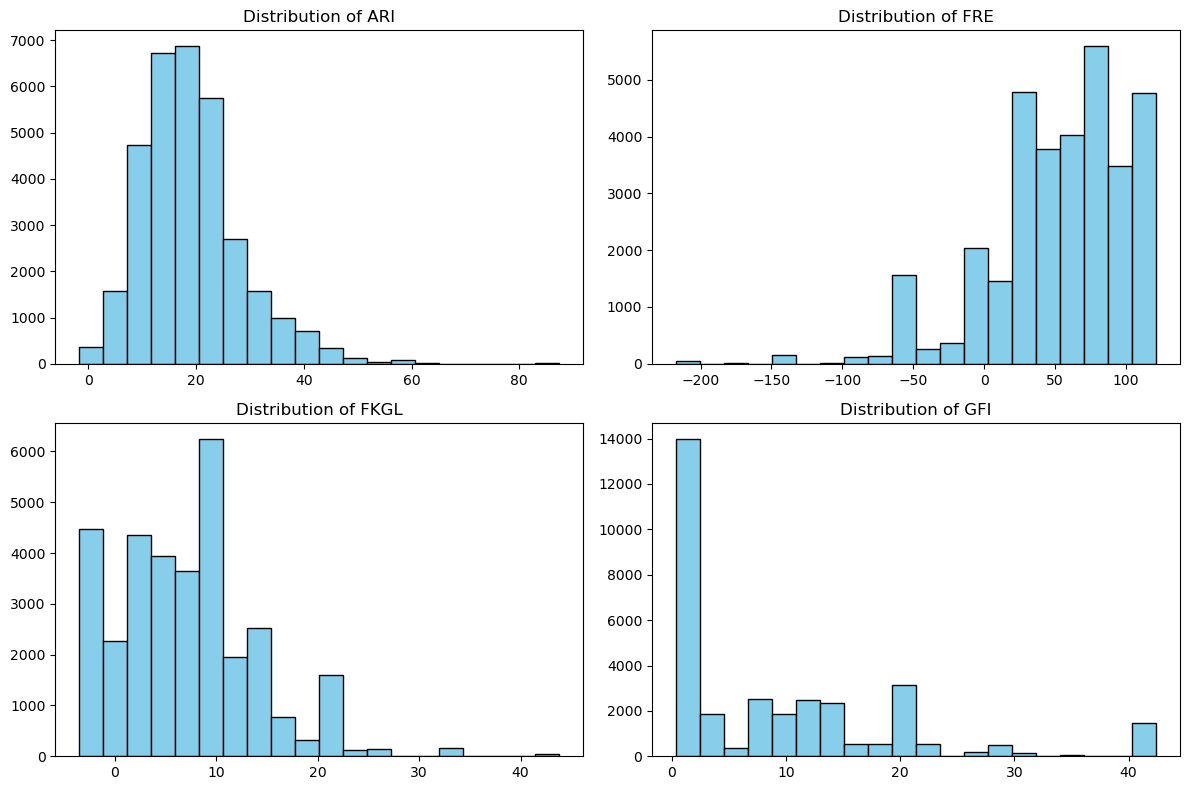

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of ARI
axs[0, 0].hist(df_artists['ARI'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of ARI')

# Histogram of FRE
axs[0, 1].hist(df_artists['FRE'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of FRE')

# Histogram of FKGL
axs[1, 0].hist(df_artists['FKGL'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of FKGL')

# Histogram of GFI
axs[1, 1].hist(df_artists['GFI'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of GFI')

plt.tight_layout()
plt.show()


In [49]:
print(df_artists[['ARI', 'FRE', 'FKGL', 'GFI']].describe())


                ARI           FRE          FKGL           GFI
count  32589.000000  32589.000000  32589.000000  32589.000000
mean      19.015950     54.041289      6.967744      9.369401
std        9.101884     48.828246      6.852850     10.217030
min       -1.700000   -217.190000     -3.500000      0.400000
25%       12.500000     34.590000      2.900000      1.200000
50%       17.700000     59.970000      6.800000      7.200000
75%       23.500000     87.720000     10.000000     14.530000
max       87.400000    121.220000     43.800000     42.400000
